# Lab 2.3: Temperature Conversion in TensorFlow

## Objective
- Install and learn the basics of the `tensorflow` library.
- Train a neural network model to output temperature in Fahrenheit given a temperature in Celsius. 
- Compare and contrast the results of training multiple models with differnet parameters. 

## Rubric
- 6 pts - Contains all required components and uses professional language and commenting
- 5 pts - Contains all required components, but uses unprofessional language, commenting, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit


## What is a Neural Network?

A **neural network** is a type of machine learning model that's designed to work a bit like the human brain — it processes information by passing it through layers of simple units called **nodes**, which are connected by **weights**.

<img src="neuralnet.png" width="300">

We will talk about neural networks that have three layers:
- **Input Layer** – Takes in the raw data (like pixels of an image or numbers in a spreadsheet).
- **Hidden Layers** – These are intermediate layers where most of the computation happens. Nodes in these layers apply weights, add a bias, and pass the result through an activation function.
- **Output Layer** – Gives the final result (e.g., classifying an image as a cat or dog).

Each time a data point enters the neural network, each node's weights and biases are updated based on the result. Over time, the weights and biases are trained to produce the correct response. 


## Creating a Neural Network


In this lab, you will create a **neural network** to calculate the temperature in Fahrenheit, given the corresponding Celsius. We know the formula to find Fahrenheit is:
$$ °F = 1.8 \times °C + 32 $$

But we will be working a neural network instead. The purpose of the model is to have the computer "intuit" the formula by transforming the input and comparing it to the expected output. 


## Install TensorFlow

Using your terminal install `tensorflow` with 

```
pip install tensorflow
```
or
```
sudo apt install python3-tensorflow
```


## Import TensorFlow and Pandas

The first step in your program is to import the `tensorflow` into Python. Typically, we `import tensorflow as tf` for brevity. Import `pandas` as well.

In [112]:
import tensorflow as tf 
import pandas as pd

## Set Up Training Data

Next, we need to create two variables for the input and output data to use to train the model.

Write a program to convert Celsius temperatures into Fahrenheit. Then create new dataframe with two columns(`celsius` and `fahrenheit`) with 5 data points each.

Then, save your `celsius` column in a new Dataframe `X` and your `fahrenheit` as a Series `y`. This should be exactly the same as how you created `X` and `y` in your Automobile Model Lab. 

In [113]:
df = pd.read_csv('weather.csv')
celsius = df['temp_c']
fahrenheit =df['temp_f']
fahrenheit_calc = [(c * 9/5) + 32 for c in celsius]
celsiust = [-100, -50, 0, 50, 100] # could change values to something along the lines of
                                         # [-100, -50, 0, 50, 100]
fahrenheitt =[-148.0, -58.0, 32.0, 122.0, 212.0]
df1 = pd.DataFrame({
'celsius': celsiust,
'fahrenheit': fahrenheitt})
x = df1[['celsius']]
y = df1['fahrenheit']


##  Creating the TensorFlow Model

The **neural network** we will use is limited to one input (Celsius temperature) and one output (Fahrenheit temperature), but the number of hidden layers and nodes can be altered. The more complex the model is, the more nodes and layers you will want to use. Since we know that the temperature model is very simple and can be modeled with just one node, let's start there.

<img src="tempnn.jpeg" width="300">


Create a model with a single input and one hidden node with `model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])`
- The single input is expressed with the `input_shape=[1]` parameter
- The single node is expressed with the `units=1` parameter

In [114]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

/home/gavinmartinez/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling and Running the Model

Next, you can compile and run the model. The compile command set the parameters for the model. 

`model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))`

Just like all the other models we've built, the model is actually built and fitted to the data with the `model.fit()` command. Notice that the parameters of this command take the input, output, and number of **epochs**, along with the verbose command to specify how much to print to the screen.

`history = model.fit(X, y, epochs=150, verbose=False)`

- `X` - This is the model input values(in Celsius).
- `y` - This is the model output values(in Fahrenheit).
- `epochs=150` - The model will run through the data 150 times. After each pass, it will update the weights and bias values to fit the model better. An **epoch** in machine learning (especially in training neural networks) is one full pass through the entire training dataset.
- `verbose=False` - This will suppress any output as the model builds. This command is optional, but makes the screen clear.


This model output is assigned to the `history` variable. This will allow you to do some analysis on the fit of the model.

### Run the code
When you run this code, expect it to take a few seconds to execute as it is running through the data 150 times.


In [115]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(x, y, epochs=150, verbose=False)

## Viewing the Results

Now that the model has run, you can use it to predict a value. Just like previous models, we can use the `model.predict()` command .

Create a new Dataframe with 100 degrees so we can see what our model predicts. It should be close to 212 degrees Fahrenheit but will probably not be exact. Each time you fit the model, you may get different resuts.

In [116]:
degrees = [100]
df2 = pd.DataFrame({'degrees':degrees})
v = df2[['degrees']]
model.predict(v)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[193.48265]], dtype=float32)

### View the Weight and Bias

Use the following lines to view the model's weight and bias for the hidden node. Compare the weight and bias of your model to that of the real equation.

$$  °F = WEIGHT × °C + BIAS $$
$$  °F = 1.8 × °C + 32 $$

```
print ("Model variables weights: " + str(model.layers[0].get_weights()[0]))
print ("Model bias: " + str(model.layers[0].get_weights()[1]))
```

In [117]:
print ("Model variables weights: " + str(model.layers[0].get_weights()[0]))
print ("Model bias: " + str(model.layers[0].get_weights()[1]))

Model variables weights: [[1.7999709]]
Model bias: [13.485559]



## Model Metrics
Let's look at some more metrics about our model. 

Each time an epoch runs, it assigns a value for the weight and bias for each node. The model uses these values with the input value (temperature in celsius) to predict an output value (temperature in fahrenheit). The **loss value** is the difference between the predicted output and the actual output.

## Import matplotlib and Plot Loss data

Run the code below to see a measure of the loss value. Notice how the loss gets smaller over time. This represents the model fitting a little better with each pass.

```
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history.history['loss'])
plt.show()
```

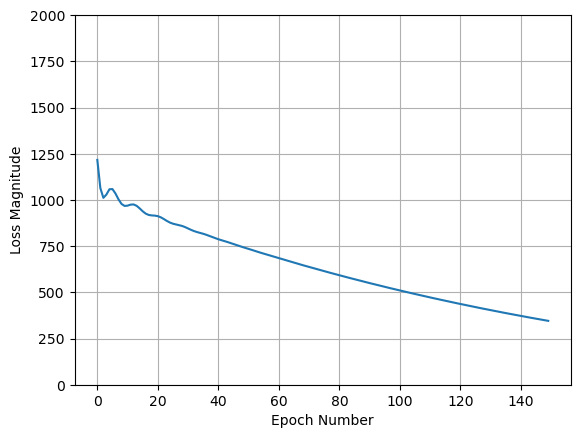

In [118]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history.history['loss'])
plt.show()

## Modifying the Model Parameters

The two models below contain the same input and output values as above, but you can make some edits to the model parameters to see the impact.

Try each of the following and note the results. **Show the prediction for 100 degrees and a loss plot for each one.**

1. Change the number of epochs that you run from 150 to 300.
2. Keep the epochs at 150. Use your weather data from the Weather Station Lab.

For each of these, you will want to compare two things:

- **The loss graph:** Does the tail flatten out? What is the estimated loss in the end?


- **Run time:** Notice the time that it takes to run each. Nearly all of the time is calculating the model, so you can compare this to the original model.fit code above.


1. Change the number of epochs that you run from 150 to 300.

/home/gavinmartinez/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model variables weights: [[1.7999709]]
Model bias: [13.485559]


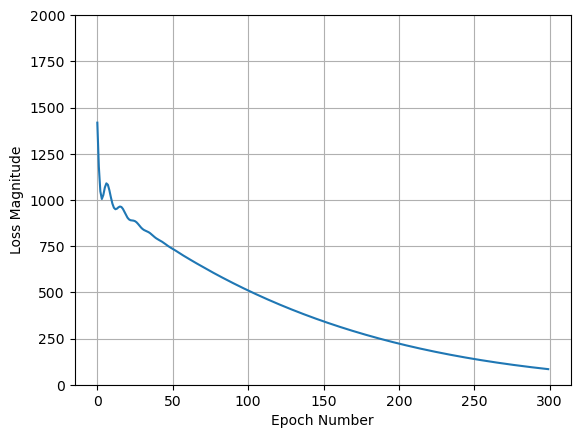

In [ ]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model2.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
history1 = model2.fit(x, y, epochs=300, verbose=False)
model2.predict(fahrenheit)
print ("Model variables weights: " + str(model.layers[0].get_weights()[0]))
print ("Model bias: " + str(model.layers[0].get_weights()[1]))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history1.history['loss'])
plt.show()

2. Keep the epochs at 150. Use your weather data from the Weather Station Lab.

/home/gavinmartinez/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model variables weights: [[1.7999709]]
Model bias: [13.485559]


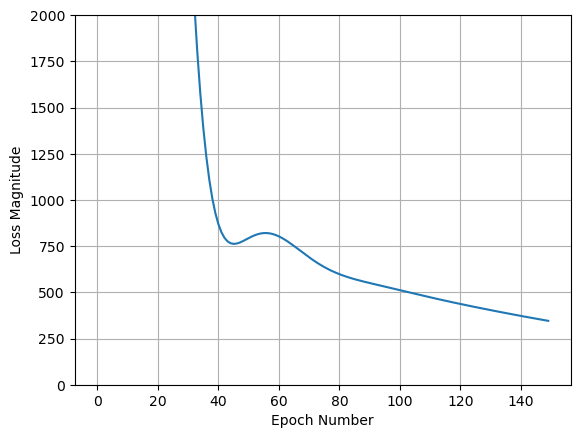

In [120]:
df = pd.read_csv('weather.csv')
celsius = df['temp_c']
fahrenheit =df['temp_f']
fahrenheit_calc = [(c * 9/5) + 32 for c in celsius]
model3 = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model3.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
history1 = model3.fit(x, y, epochs=150, verbose=False)
model3.predict(fahrenheit)
print ("Model variables weights: " + str(model.layers[0].get_weights()[0]))
print ("Model bias: " + str(model.layers[0].get_weights()[1]))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history1.history['loss'])
plt.show()

##  Modifying the Model

For this problem, we said that the model was pretty simple and one node in one layer was enough to generate good results.

What if we modified this to have 2 dense layers, each with 3 nodes?

The model layers would be something like this:
```
tf.keras.layers.Dense(units=3, input_shape=[1]),
tf.keras.layers.Dense(units=3),
tf.keras.layers.Dense(units=1)
```

Notice the first and second layers each have `units=3`. This represents the 3 nodes in the dense layers. The last layer still only has `units=1` because the final output needs to come down to one number. You can also see that the input_shape for the first layer is still `[1]` and the input hasn't changed.

Go ahead and run this model below.

Notice that the model predicted about the same, but with a lot more complexity. When creating models, you want to keep your model as simple as possible, and that will be determined by your dataset.